# **<u>ONLINE FOOD DELIVERY PROFITABILITY ANALYSIS</u>**

<span style="color: orange; font-style: italic;">Maureen Ndunge Kitang'a</span>

## **PROJECT PROPOSAL**
### *Executive Summary*

Our analysis of Uber Eats data is geared towards extracting valuable insights into customer preferences within the food industry. We're looking at how much restaurants charge, their ratings, the types of food they offer, and where they're located. Our aim? Provide straightforward tips to help these places get noticed more on the platform and make more money.

Analyzing this data helps us spot trends and patterns in the food scene. Our main goal is to provide practical recommendations that can reshape restaurant strategies and enhance their visibility on the Uber Eats platform.

### *Problem Statement*
Our main mission in this project is to provide practical guidance to clients planning to start a new restaurant chain or enhance the performance of their existing establishments. We're dealing with a widespread issue in the restaurant industry, where profit margins typically fall within the range of 10-20%. Our analysis is centered around exploring the current landscape of Uber Eats, aiming to uncover inventive strategies that can make restaurant businesses more attractive to both new and existing customers, ultimately driving higher profits.

# **WHY DOES THIS MATTER!?**
The significance of this problem stems from the remarkable growth of online food ordering platforms, exemplified by Uber Eats' substantial transaction surge. In 2022, Uber Eats recorded a staggering USD 11 billion in revenue, marking a notable 31% increase from the previous year's revenue of $8.3 billion. Concurrently, there has been a steady 2% growth in user numbers, with a significant 10% increase in merchant participation in the US. These trends underscore the platform's rising popularity among both customers and merchants.

Central to this challenge is understanding customer preferences across various dimensions, including preferred cuisines and menu diversity, within different regions. Thus, the pivotal question emerges: How can restaurants effectively analyze customer preferences to craft strategies that capitalize on the burgeoning potential of online food ordering platforms?

# **DATA UNDERSTANDING**
The primary dataset utilized in this analysis has information on various restaurants spread across the United States. Data sources were obtained through web scraping collected using Python libraries and the Uber Eats website.
There are 2 datasets - Restaurants dataset, and the Menus dataset. For more in information on the [data]("https://www.kaggle.com/datasets/ahmedshahriarsakib/uber-eats-usa-restaurants-menus")

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### *Dataset 1:Restaurants Dataset*

In [2]:
#Loading data into a Pandas DataFrame
restaurants = pd.read_csv("./data/restaurants.csv")
#Previewing the first few rows
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [3]:
#Shape of the dataframe
print("The number of rows: {}".format(restaurants.shape[0]))

print("The number of columns:{}".format(restaurants.shape[1]))

The number of rows: 63469
The number of columns:11


In [4]:
#General information about the dataset
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


The restaurants dataset 63469 rows and 11 columns. The columns with missing data are `score`, `ratings`, `category`, `price_range`, `full_address`,and `zip_code`

### *Dataset 2:Menus Dataset*

In [5]:
#Loading the data into the Pandas DataFrame
menus = pd.read_csv("./data/restaurant-menus.csv")
#Previewing the last few rows
menus.tail()

,restaurant_id,category,name,description,price
5117212,63469,Other Essentials,Composition Notebook,NaN,4.38 USD
5117213,63469,Other Essentials,Fancy Fest Savory Salmon - 3oz,NaN,1.19 USD
5117214,63469,Other Essentials,Bicycle Playing Cards,NaN,3.83 USD
5117215,63469,Other Essentials,Tidy Cat Liter - 10lbs,NaN,4.38 USD
5117216,63469,Other Essentials,7-Select Heavy Duty Foam Cooler,NaN,6.8 USD


In [6]:
#Shape of the dataframe
print("The number of rows: {}".format(menus.shape[0]))

print("The number of columns:{}".format(menus.shape[1]))

The number of rows: 5117217
The number of columns:5


In [7]:
#General information about the dataset
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 195.2+ MB


# **DATA PREPARATION**

During the Data Preparation phase, we will be performing a series of essential tasks to prepare our raw data for analysis. This phase includes the following key activities:

*Merging Datasets:*
We will combine multiple datasets, if available, to create a comprehensive dataset that encompasses all relevant information for our analysis. This may involve joining datasets based on common keys or merging them using appropriate techniques.

*Deriving New Attributes:*
To enhance the richness of our dataset and capture additional insights, we will create new attributes or features through feature engineering. This process involves transforming existing variables, generating new variables, or extracting valuable information from the data.

*Data Cleaning:*
Data cleaning is a crucial step that involves identifying and addressing various data quality issues, such as missing values, outliers, duplicates, and inconsistencies. We will employ techniques such as imputation, deletion, outlier detection, and data validation to ensure the integrity and quality of our dataset.

*Exploratory Data Analysis (EDA):*
EDA plays a vital role in understanding the underlying patterns, trends, and relationships within our data. We will perform exploratory data analysis to visualize distributions, examine correlations, detect patterns, and gain insights into the characteristics of our dataset. This will guide our subsequent analysis and decision-making processes.

### **DATA CLEANING**
>> We will begin our Data Preparation phase by prioritizing data cleaning for individual datasets before merging. This approach allows us to address data inconsistencies, missing values, duplicates, outliers, and other quality issues specific to each dataset. By cleaning the datasets individually, we can ensure data integrity and consistency before merging. Additionally, considering differences in data sizes and structures among datasets, cleaning them separately facilitates more focused and efficient data cleaning efforts. Once each dataset is cleaned and standardized, we will proceed with merging them to create a comprehensive dataset for further analysis.

In [8]:
def check_missing_values(df):
   
    missing_count = df.isnull().sum()  # Count missing values in each column
    missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage of missing values

    # Create DataFrame to display missing values count and percentage
    missing_values = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percentage.round(2)
    })
    
    return missing_values

In [9]:
check_missing_values(restaurants)

,Missing Values,Percentage
id,0,0.00
position,0,0.00
name,0,0.00
score,28167,44.38
ratings,28167,44.38
category,85,0.13
price_range,10617,16.73
full_address,453,0.71
zip_code,517,0.81
lat,0,0.00


#### *Dealing with Missing Values*

The columns '`id`, `position`, `name`, `lat`, and `lng` have no missing values (0% missing). These columns are complete and do not require imputation or further handling for missing data.

The columns `score` and `ratings` have a significant proportion of missing values, with approximately `44.38%`missing in each column. This suggests that a large portion of the data in these columns is missing.Given the significance of these features and their importance for the analysis, median imputation will be done to handle the missing values.

The columns `category`, `price_range`, `full_address`, and `zip_code` have relatively fewer missing values, ranging from 0.13% to 16.73%, it's worth considering whether these missing values are significant enough to warrant deletion.

In [10]:
# Median imputation for 'score' and 'ratings' columns
median_score = restaurants['score'].median()
median_ratings = restaurants['ratings'].median()
restaurants['score'] = restaurants['score'].fillna(median_score)
restaurants['ratings'] = restaurants['ratings'].fillna(median_ratings)

In [11]:
# Deletion of rows with missing values in 'category', 'price_range', 'full_address', and 'zip_code' columns
restaurants.dropna(subset=['category', 'price_range', 'full_address', 'zip_code'], inplace=True)

In [12]:
check_missing_values(menus)

,Missing Values,Percentage
restaurant_id,0,0.00
category,0,0.00
name,4,0.00
description,1452145,28.38
price,0,0.00


#### *Dealing with Missing Values*

The `description` column stands out as having a substantial number of missing values. To address this issue, rows with missing values in the 'description' column will be deleted to ensure data integrity.
The other columns (`restaurant_id`, `category`, '`name`, and `price`) have either no missing values or a negligible number of missing values, suggesting that they are relatively complete and may not require extensive handling for missing data.

In [13]:
# Deletion of rows with missing values in 'description' column
menus.dropna(subset=['description','name'], inplace=True)

>> In addition to handling missing values, ensuring the absence of duplicate data is crucial for maintaining the integrity and reliability of our datasets. Data duplicates can skew analysis results, leading to inaccurate insights and conclusions. Therefore, as part of our data cleaning process, we will systematically check for and remove any duplicate entries within each dataset.

In [14]:
def check_duplicates(df):
    
    duplicates = df.duplicated().any()
    return duplicates

# Check for duplicates in the restaurants DataFrame
has_duplicates = check_duplicates(restaurants)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")


No duplicates found in the DataFrame.


In [15]:
# Check for duplicates in the restaurants DataFrame
has_duplicates = check_duplicates(menus)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

Duplicates found in the DataFrame.


>>> Upon examining the menus DataFrame, it appears that duplicate rows have been detected. To further investigate the extent of duplication and gain insight into the duplicated data, we can inspect the DataFrame containing these duplicate rows. This will allow us to identify the specific duplicated entries and assess any patterns or inconsistencies present in the data. By closely examining these duplicates, we can make informed decisions regarding the appropriate actions to take, such as removal or additional data cleaning measures.

In [16]:
# Check for duplicates in the 'menus' DataFrame across all columns
duplicate_menus = menus[menus.duplicated(keep=False)]

# Display duplicate rows for inspection
print("Duplicates found in the DataFrame:")
print(duplicate_menus)


Duplicates found in the DataFrame:
         restaurant_id          category  \
379                  7  Nigiri / Sashimi   
380                  7  Nigiri / Sashimi   
381                  7  Nigiri / Sashimi   
388                  7  Nigiri / Sashimi   
10677              165         Beverages   
...                ...               ...   
5116337          63449   Spring & Summer   
5116339          63449   Spring & Summer   
5116341          63449   Spring & Summer   
5117028          63469              Food   
5117040          63469              Food   

                                                      name  \
379                                            Tuna Tataki   
380                                                 Amaebi   
381                                                 Amaebi   
388                                            Tuna Tataki   
10677                                  Strawberry Lemonade   
...                                                    ...   
51

In [17]:
# Keep the first occurrence of each duplicated row and drop the rest
menus_cleaned = menus.drop_duplicates(keep='first')

# Confirm that duplicates have been removed
print("Duplicates removed. New DataFrame shape:", menus_cleaned.shape)

Duplicates removed. New DataFrame shape: (3644316, 5)


#### *Merging the Datasets*
>> Merging datasets involves combining multiple datasets into a single comprehensive dataset. This process is essential for integrating data from different sources to perform unified analyses. In our case, we have two datasets: one containing information about restaurants and another containing menu data. Merging these datasets allows us to create a unified dataset that includes both restaurant details and their respective menus.

In [18]:
# Merging the restaurant dataset with the menu dataset
merged_data=restaurants.merge(menus, left_on='id', right_on='restaurant_id', how="outer")

In [19]:
# Display the merged dataset
print("Shape of merged dataset:", merged_data.shape)
# Display the first few rows of the merged dataset in table format
merged_data.head()

Shape of merged dataset: (3666905, 16)


,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,name_y,description,price
0,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [20]:
print(merged_data.columns)

Index(['id', 'position', 'name_x', 'score', 'ratings', 'category_x',
       'price_range', 'full_address', 'zip_code', 'lat', 'lng',
       'restaurant_id', 'category_y', 'name_y', 'description', 'price'],
      dtype='object')


The columns listed below are being dropped during the data cleaning process for the following reasons:

- `lat` and `lng`: These columns represent latitude and longitude coordinates, which are not relevant for the current analysis. However, for our current analysis, these coordinates are redundant as we have already extracted state and region information from the address column.
- Since we have the full address and zip code, which provide sufficient location details for our analysis, keeping the latitude and longitude coordinates would be unnecessary.

- `restaurant_id`: This column appears to be a duplicate of the `id` column, which likely serves as the unique identifier for each restaurant. Therefore, keeping both columns is unnecessary.

- `description`: This column contains descriptions of food items from the menu dataset. Since the focus of the analysis is on restaurant characteristics and profitability, individual food item descriptions are not needed.

- `name_y`: This column is likely a duplicate of the `name` column from one of the datasets. Keeping duplicate columns can lead to confusion and unnecessary redundancy in the data.

- `category_y`: Similar to `name_y`, this column is likely a duplicate of the `category` column from one of the datasets. Removing duplicates helps maintain data consistency and clarity.

- `price_range`: While the price range of items may be informative, the analysis might focus more on mean prices or specific item prices rather than general price ranges.

In [21]:
# Dropping the columns that are not relevant to the analysis
cols_to_drop=['lat', 'lng', 'restaurant_id', 'description', 'name_y', 'category_y', 'price_range']
merged_data = merged_data.drop(cols_to_drop, axis=1)

#### *Removing Unwanted Characters*

>> In this step, we aim to clean the dataset by removing unnecessary characters from specific columns. For instance, we remove the 'USD' currency symbol from the price column to ensure uniform representation and facilitate numerical analysis. By converting the prices to float type, we prepare the data for aggregation and computation. After calculating the mean prices for each restaurant, we merge the results back into the dataframe. Finally, we drop the redundant column, ensuring a cleaner and more standardized dataset for analysis.

In [22]:
# Removing the 'USD' from the price of item column
merged_data['price'] = merged_data['price'].str.strip(' USD')

In [23]:
# Converting the prices into a float type
merged_data['price'] = merged_data['price'].astype(float)

# Grouping by restaurant id to find the mean prices for each restaurant
mean_prices = merged_data.groupby('id')['price'].mean().reset_index()
mean_prices['price'] = mean_prices['price'].round(2)

# Merging mean prices back into dataframe
merged_data = pd.merge(merged_data, mean_prices, on ='id', suffixes = ('','_mean'))

# Renaming the price of item column to mean price per item
merged_data.rename(columns = {'mean_price':'price'}, inplace = True)

# Dropping the redundant price_of_item column
merged_data.drop('price', axis = 1, inplace = True)

#### *Extracting City and State from Full Address*
>> We have extracted the city and state information from the "full_address" column in our DataFrame. Using a regular expression pattern, we located the city and state within the address string and created a new column called "city_state" to store this combined information. This allows us to isolate and analyze the geographical details of each location more effectively.

In [24]:
# Changing the full_address column to a string type
merged_data['full_address'] = merged_data['full_address'].astype(str)

In [25]:

import re

def extract_city_state(address):
    city_state_pattern = r'[A-Za-z\s]+,\s[A-Z]{2}'
    match = re.search(city_state_pattern, address)
    if match:
        return match.group()
    return None

# Apply the function to the full_address column in the DataFrame
merged_data['city_state'] = merged_data['full_address'].apply(extract_city_state)

In [26]:
merged_data.head()

,id,position,name_x,score,ratings,category_x,full_address,zip_code,price_mean,city_state
0,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,"Birmingham, AL"
1,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,"Birmingham, AL"
2,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,"Birmingham, AL"
3,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,"Birmingham, AL"
4,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,"Birmingham, AL"


>> We are converting the data type of the `ratings` column from float to integer because ratings represent the number of ratings received by a restaurant. Since the number of ratings is always a whole number, it makes sense to store this data as integers rather than floats. This conversion ensures that the data accurately reflects the nature of ratings and allows for more efficient storage and analysis.

In [27]:
# Change data type of ratings column to integer
merged_data['ratings'] = merged_data['ratings'].astype(int)

# Rename ratings column to number_of_ratings
merged_data.rename(columns={'ratings': 'number_of_ratings'}, inplace=True)

### **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) plays a crucial role in our project, aiming to uncover insights and patterns within the Uber Eats dataset. We employ various types of analysis to understand the data better and inform decision-making for improving restaurant profitability on the platform.


#### **UNIVARIATE ANALYSIS**
In univariate analysis, we focus on exploring individual variables within our dataset. For instance, we analyze the distribution of ratings, examining the frequency of different rating values assigned to restaurants. This helps us identify common ratings and potential outliers, providing insights into customer satisfaction levels.

In [28]:
print(merged_data.columns)

Index(['id', 'position', 'name_x', 'score', 'number_of_ratings', 'category_x',
       'full_address', 'zip_code', 'price_mean', 'city_state'],
      dtype='object')


`1. Position`

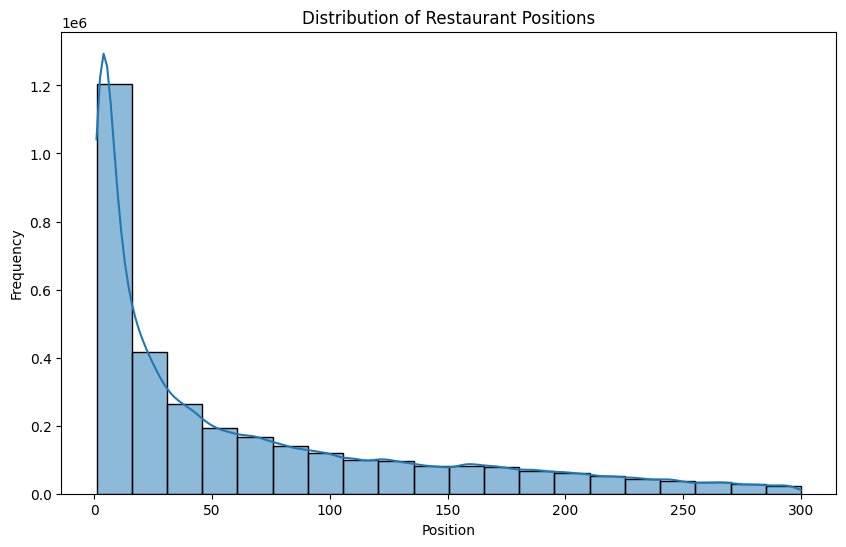

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['position'], bins=20, kde=True)
plt.title('Distribution of Restaurant Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

` 2. Name`

C:\Users\ndung\AppData\Local\Temp\ipykernel_3440\1474429923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')
C:\Users\ndung\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


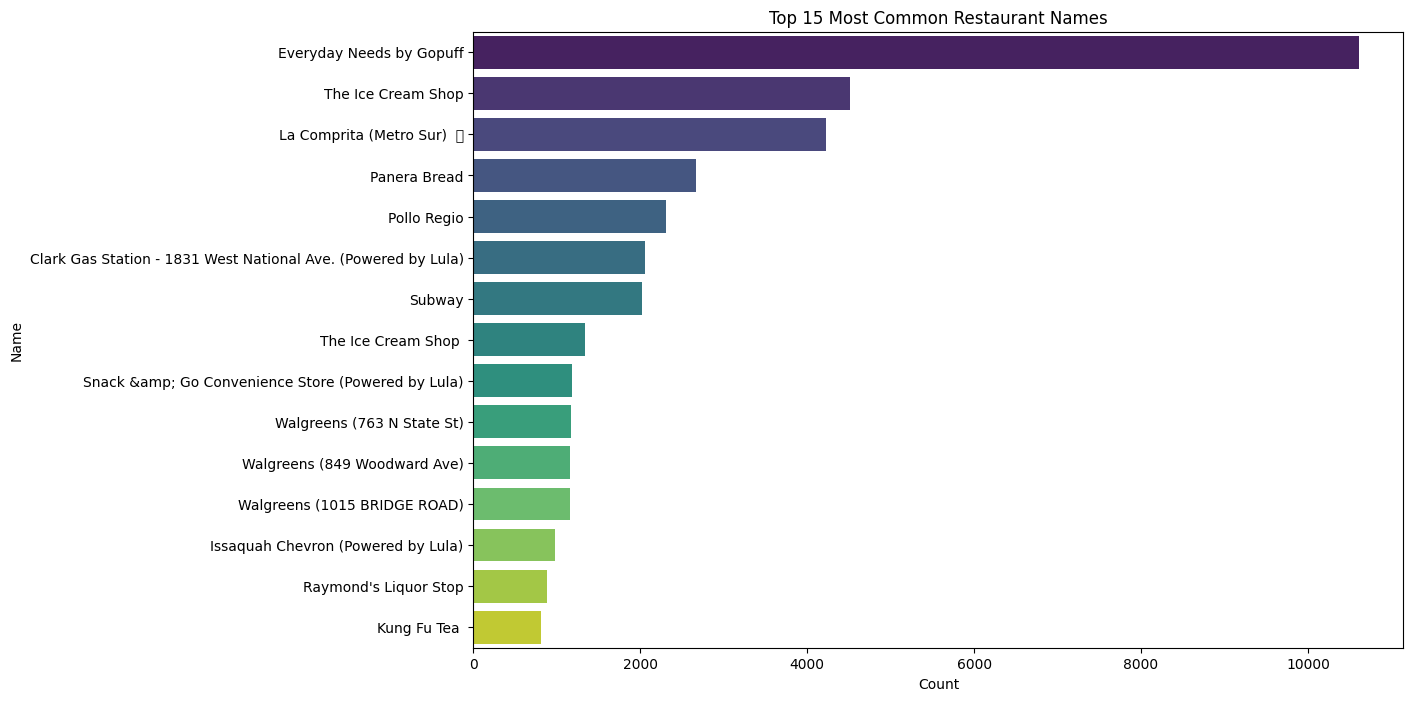

In [30]:
plt.figure(figsize=(12, 8))
top_names = merged_data['name_x'].value_counts().head(15)  # Get the top 15 most common names
sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')
plt.title('Top 15 Most Common Restaurant Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

`3. Score`

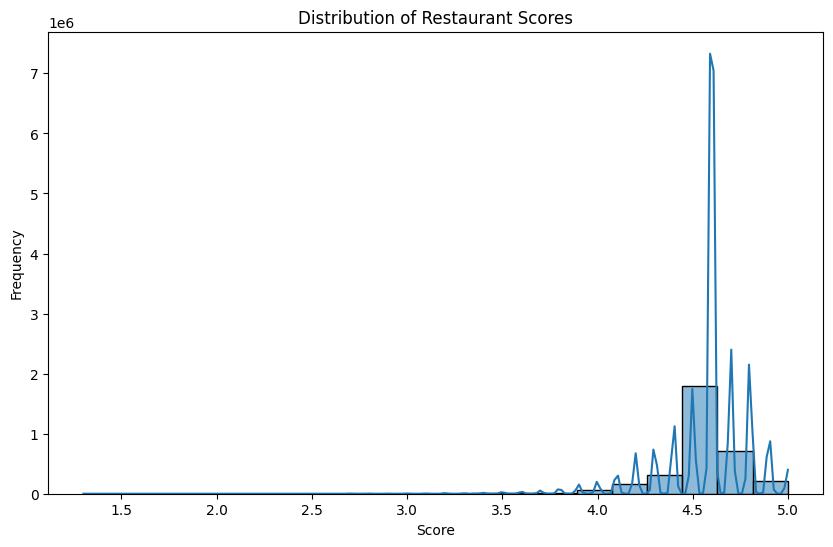

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['score'], bins=20, kde=True)
plt.title('Distribution of Restaurant Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

`4. ratings`

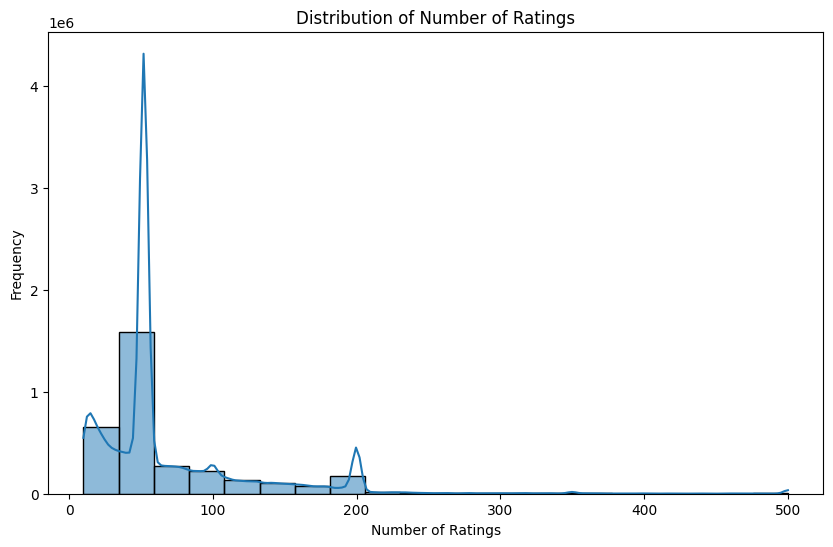

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['number_of_ratings'], bins=20, kde=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

`5. category_of_restaurant `

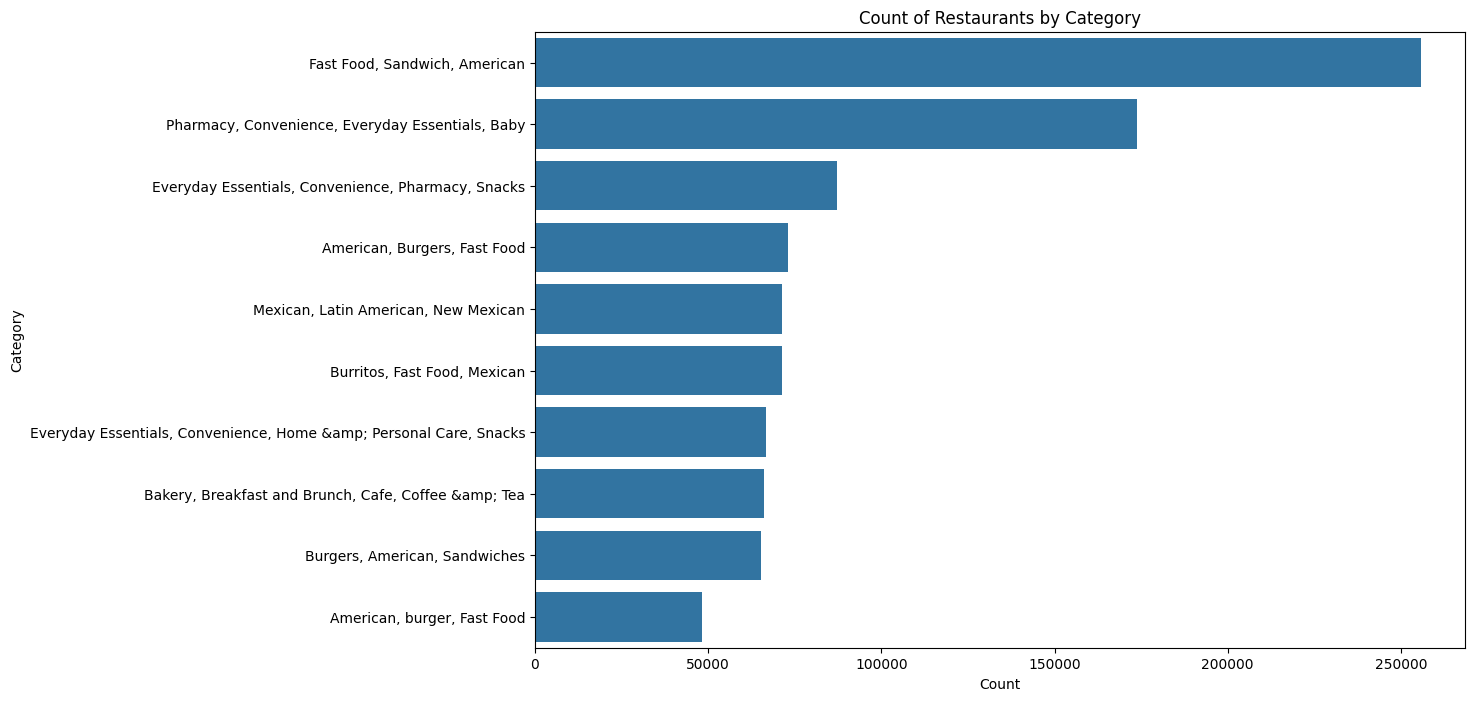

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(y='category_x', data=merged_data, order=merged_data['category_x'].value_counts().index[:10])
plt.title('Count of Restaurants by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

`6. zip_code `

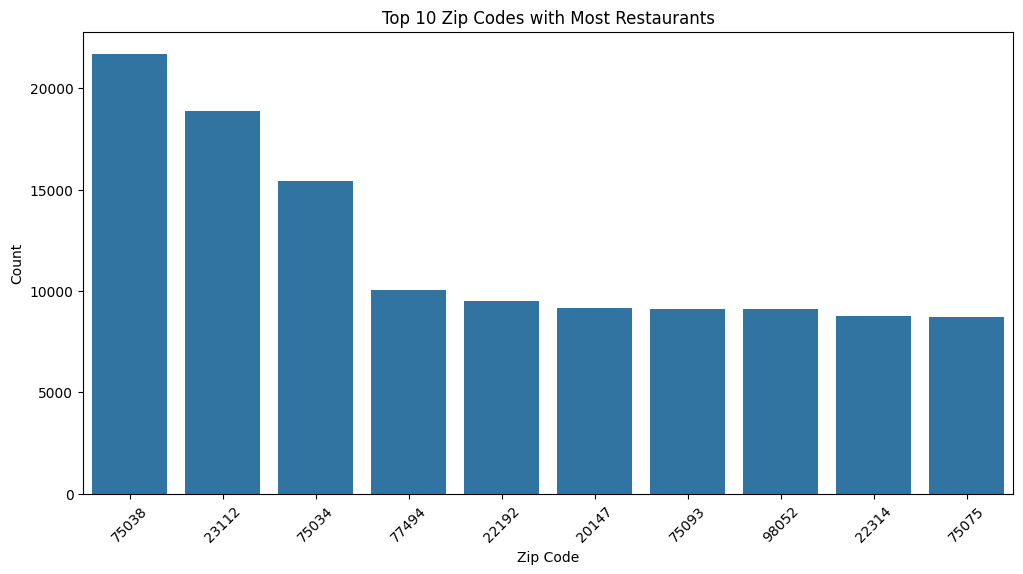

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='zip_code', data=merged_data, order=merged_data['zip_code'].value_counts().index[:10])
plt.title('Top 10 Zip Codes with Most Restaurants')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

`7. city_state`

`8. price_of_item`

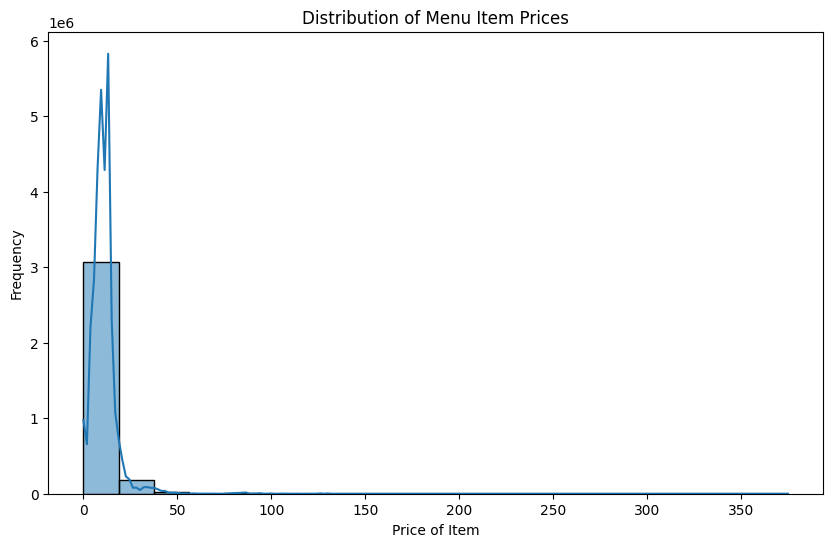

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['price_mean'], bins=20, kde=True)
plt.title('Distribution of Menu Item Prices')
plt.xlabel('Price of Item')
plt.ylabel('Frequency')
plt.show()